<a href="https://colab.research.google.com/github/arqMedes/PDS/blob/main/3-Fourier/Fourier_em_TD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Série e Transformada de Fourier

A Série de Fourier e a Transformada de Fourier em tempo discreto são ferramentas fundamentais na análise de sinais e sistemas no domínio da frequência, mas têm propósitos e aplicações distintas. A principal diferença está no tipo de sinal que cada uma analisa:

📌 1. Série de Fourier em Tempo Discreto (DTFS)
Aplica-se a: sinais periódicos em tempo discreto.

Objetivo: representar um sinal periódico como uma soma (série) de exponenciais complexas de diferentes frequências.

Fórmula:

Para um sinal periódico $𝑥[𝑛]$ com período N:
$$
𝑥[𝑛]= \sum X[k] e^{j\frac{2\pi}{N}kn}
$$
Onde os coeficientes 𝑋[𝑘] são dados por:
$$
X[k]= \sum x[n] e^{-j\frac{2\pi}{N}kn}
$$
​


Frequência: discreta e finita (𝑘=0,1,...,𝑁−1).

Aplicação: análise de sinais periódicos (ex: sinais gerados por sistemas digitais com comportamento cíclico).

📌 2. Transformada de Fourier em Tempo Discreto (DTFT)

Aplica-se a: sinais aperiódicos em tempo discreto (ou seja, sinais que não se repetem).

Objetivo: representar um sinal a periódico como uma integral contínua de exponenciais complexas.

Fórmula:

Para um sinal a periódico $x[n]$:

$$𝑋(e^{jw}) = \sum_{-\infty}^{∞}x[n]⋅e^{
−jωn}
$$
E a transformada inversa é:

$$
x[n]=\frac{1}{2\pi}\int_{-\pi}^\pi𝑋(e^{jw})e^{jw}dw
$$

Frequência: contínua no intervalo
𝜔 ∈ [−𝜋,𝜋].

Aplicação: análise espectral de sinais gerais (como amostras de áudio, sinais digitais sem periodicidade).

🔍 Interpretação Transformada Z e Transformada de Fourier em Tempo Discreto

A Transformada Z é mais geral — ela inclui informações sobre convergência (Região de Convergência - ROC) e permite analisar estabilidade e causalidade.

A DTFT só é válida quando a ROC da Transformada Z inclui a circunferência unitária (r=1), pois só assim a série converge para o espectro de Fourier.

Em termos de uso:

Transformada Z → análise mais ampla (estabilidade, filtros, sistemas LTI).

DTFT → análise puramente espectral de sinais.

Como entender visualmente (Transformada Z, Transformada e Série de Fourier em Tempo Discreto)

Imagine assim:

Transformada Z → “Mapa 3D” no plano complexo
z que mostra como o sinal se comporta para diferentes r e ω.

DTFT → “Corte” desse mapa ao longo da circunferência unitária r=1 → frequência contínua.

DTFS (caso periódico) → esse corte vira amostras igualmente espaçadas na frequência → sequência
X[k] repetida periodicamente.

💡 Resumo em frase única:

Série de Fourier discreta (DTFS) é o “modo periódico” da DTFT, que por sua vez é a Transformada Z restrita à circunferência unitária.



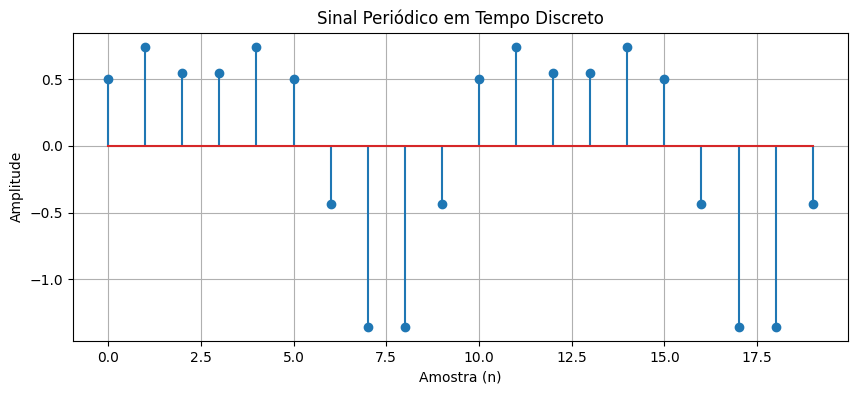

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a periodic discrete-time signal
N = 10  # Period of the signal
n = np.arange(0, 2 * N) # Two periods
x = np.sin(2 * np.pi * n / N) + 0.5 * np.cos(4 * np.pi * n / N)

# Plot the signal in the time domain
plt.figure(figsize=(10, 4))
plt.stem(n, x)
plt.title('Sinal Periódico em Tempo Discreto')
plt.xlabel('Amostra (n)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Acima, temos o gráfico do sinal periódico em tempo discreto no domínio do tempo. Agora, vamos calcular e visualizar a sua representação no domínio da frequência usando a Série de Fourier em Tempo Discreto (DTFS).

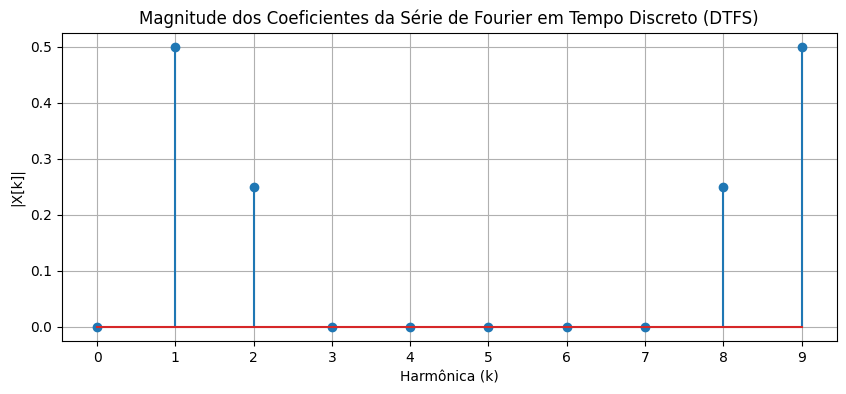

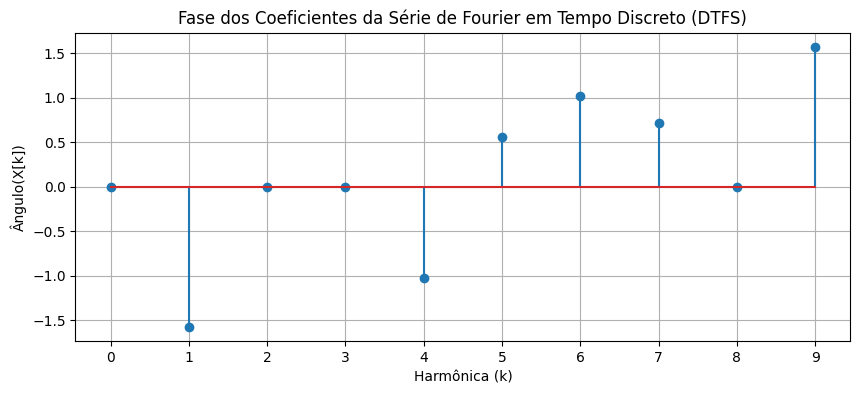

In [ ]:
# Calculate the DTFS coefficients
Xk = np.fft.fft(x[:N]) / N  # DFT of one period, scaled by N

# Frequencies for the DTFS
k = np.arange(N)
frequencies = 2 * np.pi * k / N

# Plot the magnitude of the DTFS coefficients
plt.figure(figsize=(10, 4))
plt.stem(k, np.abs(Xk))
plt.title('Magnitude dos Coeficientes da Série de Fourier em Tempo Discreto (DTFS)')
plt.xlabel('Harmônica (k)')
plt.ylabel('|X[k]|')
plt.xticks(k)
plt.grid(True)
plt.show()

# Plot the phase of the DTFS coefficients
plt.figure(figsize=(10, 4))
plt.stem(k, np.angle(Xk))
plt.title('Fase dos Coeficientes da Série de Fourier em Tempo Discreto (DTFS)')
plt.xlabel('Harmônica (k)')
plt.ylabel('Ângulo(X[k])')
plt.xticks(k)
plt.grid(True)
plt.show()

Os gráficos acima mostram a magnitude e a fase dos coeficientes da DTFS. Cada pico representa a contribuição de uma frequência específica (harmônica) para a composição do sinal original no domínio do tempo.

Neste exemplo:
- O pico em k=1 corresponde à frequência fundamental do termo `sin(2 * pi * n / N)`.
- O pico em k=2 corresponde à frequência do termo `cos(4 * pi * n / N)`.
- Devido à natureza complexa da DTFS e dos sinais reais, você verá componentes simétricas para frequências negativas (representadas aqui por k > N/2, devido à periodicidade da DTFS).

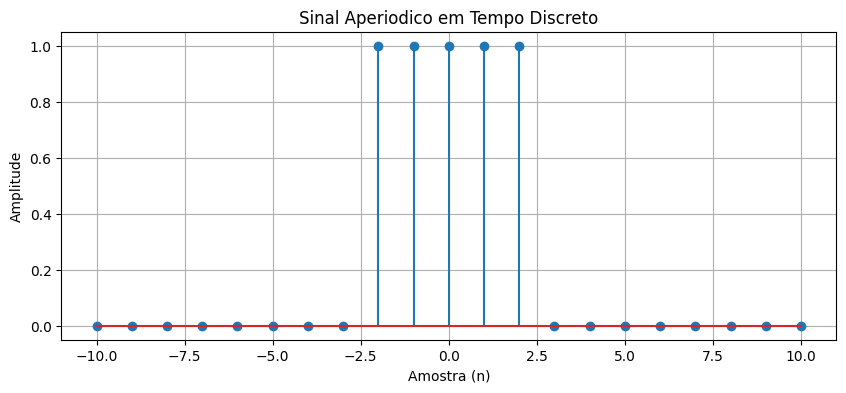

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define an aperiodic discrete-time signal (e.g., a rectangular pulse)
n = np.arange(-10, 11)
x_aperiodic = np.zeros_like(n, dtype=float)
x_aperiodic[(n >= -2) & (n <= 2)] = 1.0 # A pulse from n=-2 to n=2

# Plot the aperiodic signal in the time domain
plt.figure(figsize=(10, 4))
plt.stem(n, x_aperiodic)
plt.title('Sinal Aperiodico em Tempo Discreto')
plt.xlabel('Amostra (n)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Acima, temos o gráfico de um sinal aperiódico em tempo discreto (um pulso retangular) no domínio do tempo. Agora, vamos calcular e visualizar a sua representação no domínio da frequência usando a Transformada de Fourier em Tempo Discreto (DTFT).

Como a DTFT é contínua no domínio da frequência, não podemos calculá-la para todos os valores de frequência. Em vez disso, calcularemos a Transformada Discreta de Fourier (DFT) do sinal, que é uma amostragem da DTFT, e a visualizaremos. A DFT de um sinal aperiódico de duração finita se aproxima da DTFT do sinal.

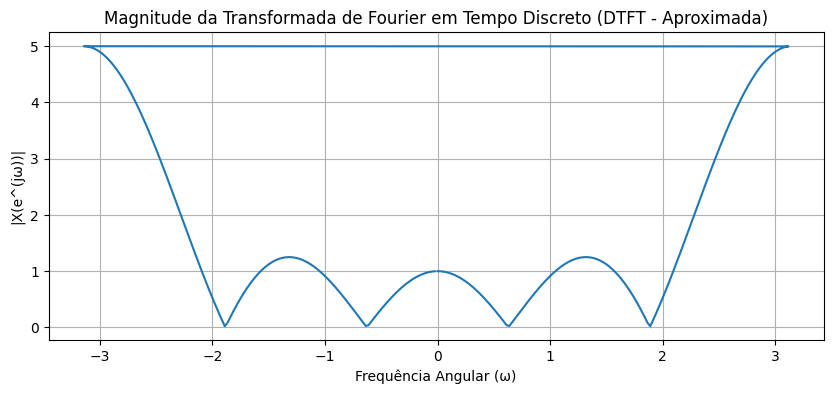

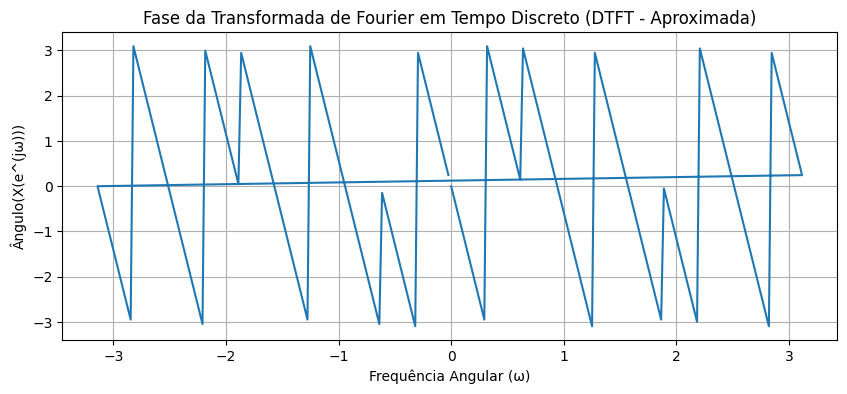

In [ ]:
# Calculate the DTFT (approximated by DFT)
# We use a larger number of points for the DFT to get a better approximation of the continuous DTFT
N_fft = 256 # Number of points for the DFT
X_dtft = np.fft.fft(x_aperiodic, N_fft)

# Frequencies for the DTFT (approximated)
omega = 2 * np.pi * np.arange(N_fft) / N_fft - np.pi # Map k to frequencies from -pi to pi
X_dtft_shifted = np.fft.fftshift(X_dtft) # Shift the zero frequency to the center
omega_shifted = np.fft.fftshift(omega)


# Plot the magnitude of the DTFT
plt.figure(figsize=(10, 4))
plt.plot(omega_shifted, np.abs(X_dtft_shifted))
plt.title('Magnitude da Transformada de Fourier em Tempo Discreto (DTFT - Aproximada)')
plt.xlabel('Frequência Angular (ω)')
plt.ylabel('|X(e^(jω))|')
plt.grid(True)
plt.show()

# Plot the phase of the DTFT
plt.figure(figsize=(10, 4))
plt.plot(omega_shifted, np.angle(X_dtft_shifted))
plt.title('Fase da Transformada de Fourier em Tempo Discreto (DTFT - Aproximada)')
plt.xlabel('Frequência Angular (ω)')
plt.ylabel('Ângulo(X(e^(jω)))')
plt.grid(True)
plt.show()

Os gráficos acima mostram a magnitude e a fase da DTFT aproximada. Para um pulso retangular no tempo, a magnitude da sua DTFT tem a forma de uma função sinc (seno cardeal) no domínio da frequência. Note que a frequência é contínua no intervalo de $-\pi$ a $\pi$.